<a href="https://www.kaggle.com/code/yousefqasem/investigate-a-dataset-no-show-appointment?scriptVersionId=120147098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Investigate a Dataset - [No-show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**Dataset:** [No-show Appointment](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

**Source:** [www.Kagle.com](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

**Brief Description:** 
No-show appointments in healthcare is a problem faced by medical centers around the
world, and understanding the factors associated with no-show behavior is essential. This dataset contains records of 110,528 medical appointments in Brazil, with a specific emphasis on determining whether or not patients attend their appointments. Each row of the dataset includes various attributes about the patient.

1. `PatientId`: refers to the patient ID.
2. `AppointmentID`: a unique ID that refers to an appointment.
3. `Gender`: refers to the patient's gender (i.e., M/F).
4. `ScheduledDay`: refers to the Date/Time a patient book for his/her appointment.
5. `AppointmentDay`: refers to the date and time when the patient made the appointment.
6. `Age`: refers to the patient's age.
7. `Neighbourhood`: refers to the location of the hospital.
8. `Scholarship`: shows whether the patient is a beneficiary of the Brazilian welfare program called Bolsa Família or not
9. `Hipertension`: shows whether the patient has high blood pressure or not.
10. `Diabetes`: shows whether the patient has diabetes or not.
11. `Alcoholism`: shows whether the patient has an alcoholism problem or not. 
12. `Handcap`: shows whether the patient has special needs or not.
13. `SMS_received`: specifies if the patient has been sent a text message reminder or not. 
14. `No-show`: 'No' means the patient came to the appointment, and 'Yes' means they didn't.




### Question(s) for Analysis


>* RQ1. What is the percentage of patients who attend or miss their scheduled appointments?
>* RQ2. What are the proportions of each category for each variable, and what are the corresponding attendance rates broken down by category?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

* #### Assessing and Building Intuition

In [3]:
# load noshow data into data frame
df = pd.read_csv('/kaggle/input/noshowappointments-dataset/noshowappointments-kagglev2-may-2016.csv')

# display first five rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# print the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In order to maintain consistency and facilitate easy analysis, we need to make the following modifications to the dataset:

- Changing the data type of `PatientId` from `float` to `int`, to ensure consistency and avoid potential issues with floating-point precision.
- Changing the data types of `ScheduledDay` and `AppointmentDay` from `object` to `datetime`, to enable more accurate date-time operations and analysis.

In [5]:
# print the column labels in the dataset
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In order to ensure consistency throughout the dataset, it may be necessary to make some modifications, including `renaming certain columns`. By doing so, we can improve the clarity and organization of the data, and make it easier to analyze and interpret.

In [6]:
# Dimensionality (# samples, columns and rows) of the dataset
df.shape

(110527, 14)

In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 110527
Number of columns: 14


In [8]:
# Print a concise summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Count distinct observations over the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
# statistics sumary of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


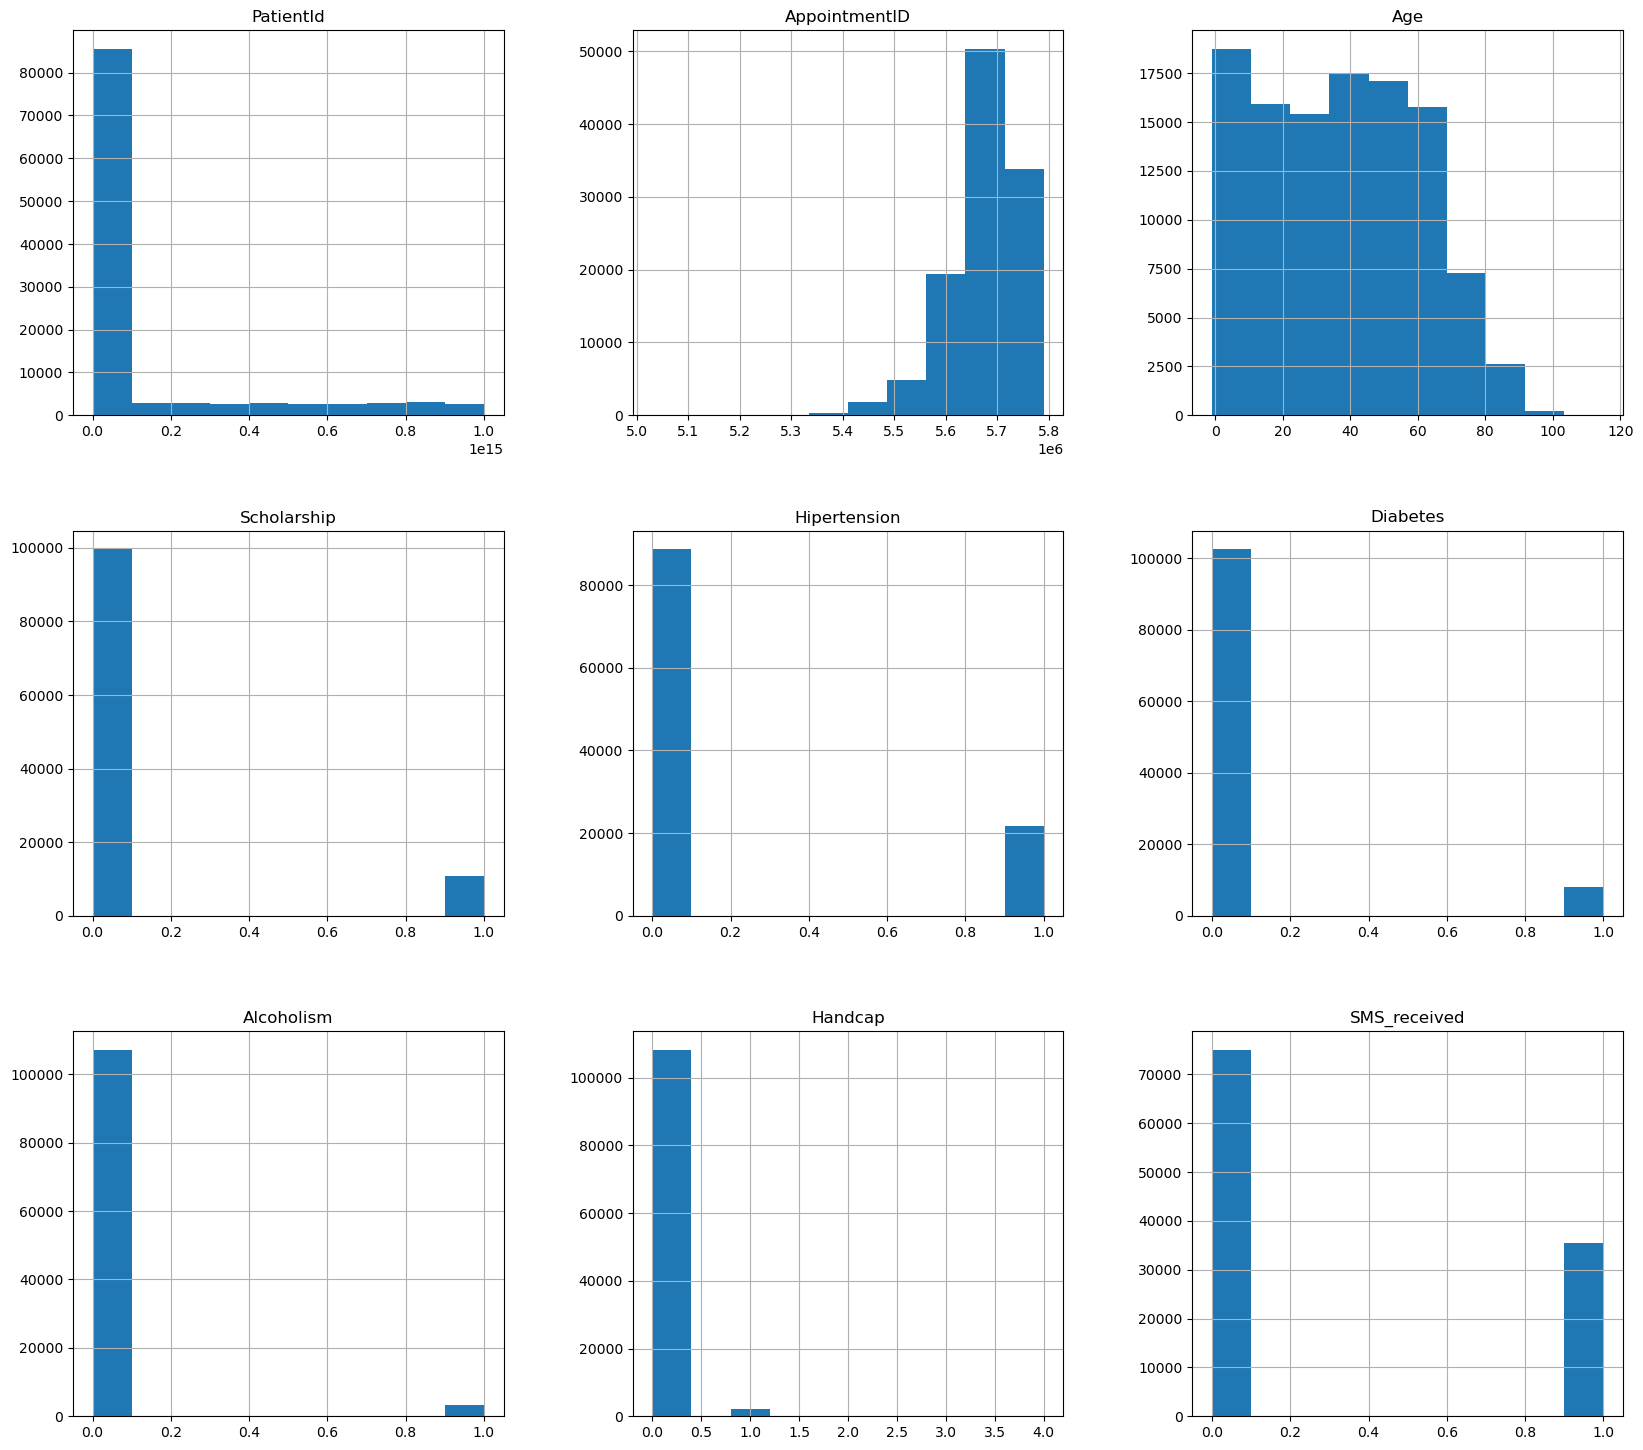

In [11]:
df.hist(figsize=(20, 18));

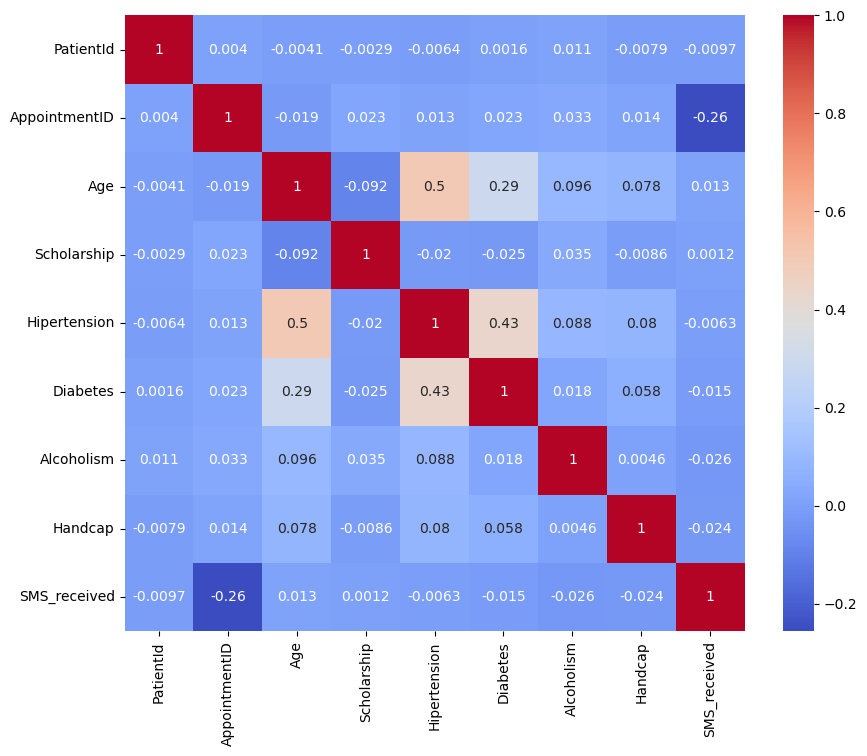

In [12]:
# To show the correlations between the columns of the dataset

corr = df.corr()
# Set the size of the figure
fig, ax = plt.subplots(figsize=(10, 8))
# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax);

* #### Checking missing values

In [13]:
# print missing values
df.isnull().sum().sum()

0

After the necessary checking, we have confirmed that the dataset has `no missing` values.

* #### Checking duplicate values

In [14]:
# print duplicated rows
df.duplicated().sum()

0

We have determined that the dataset has `no duplicated rows`, which ensures that each data point is unique and contributes to the analysis in a meaningful way. However, we must also consider that a patient can have multiple appointments in the dataset, which means that there may be multiple rows associated with the same patient. Therefore, we will perform a thorough analysis to ensure that the data accurately represents the population and accounts for any repeat observations of individual patients.

In [15]:
# Number of distinct items
df['AppointmentID'].nunique()

110527

In [16]:
# Number of duplicated items 
df['AppointmentID'].duplicated().sum()

0

In [17]:
# Number of distinct items
df['PatientId'].nunique()

62299

In [18]:
# Number of duplicated items
df['PatientId'].duplicated().sum()

48228

Upon reviewing the dataset, we have observed that the number of `AppointmentID` exceeds the number of `PatientID`, indicating that a patient may have multiple appointments recorded in the dataset. This finding is important for our analysis, as it highlights the need to account for repeat observations of individual patients when conducting statistical analyses or drawing conclusions from the data.

* #### Incorrect Data Checking

According to [`Wikipedia`](https://en.wikipedia.org/wiki/Statistical_data_type) and [`fullstory`](https://www.fullstory.com/blog/categorical-vs-quantitative-data/), we have various simple data types as illustrated in the diagram bellow.
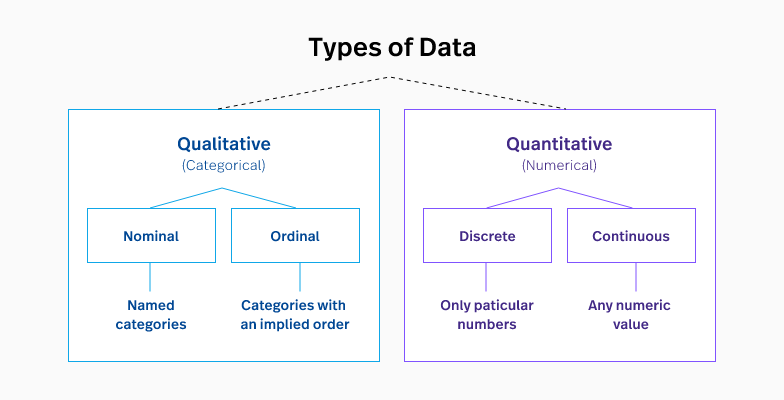

Based on the nature of the dataset, the columns fall in the following categries:
* `Numerical`:
  * **Continuouns**: ScheduledDay, AppointmentDay, Age.
  * **Discrete**: PatientId, AppointmentID.
* `Categorical`:
  * **Nominal**: Gender, Neighborhood, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, Show-up.
  * **Ordinal**: Handcap.
Let's verify the content accordigly!

In [19]:
# Is there a zero or negetive AppointmentID?
df[df['AppointmentID'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [20]:
# Is there a zero or negetive PatientId?
df[df['PatientId'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [21]:
# Is there a zero or negetive PatientId?
df[df['PatientId'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [22]:
# Is there a zero or negetive Age?
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


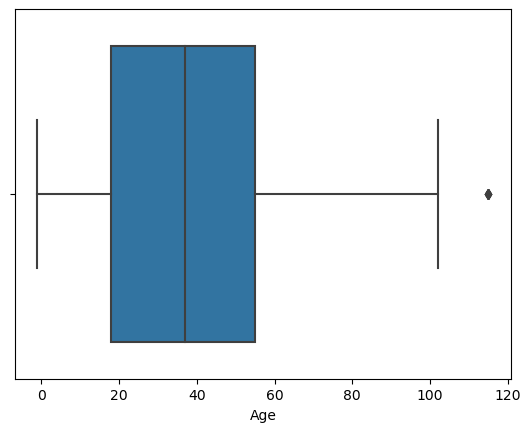

In [23]:
# Is there an outlier in the Age variable?
sns.boxplot(x=df['Age']);

We have identified a negative age value of -1 in the dataset, which could be due to an error in data entry or an appointment made before the patient's birth. Although there are alternative approaches, such as recoding the negative age value to a more appropriate value. However, as it is an outlier and only represents a single value, `deleting it from the dataset` is a reasonable course of action.

Our next step is to address the identified errors and take appropriate action to correct or mitigate them.


### Data Cleaning
 

In order to maintain consistency and facilitate easy analysis, let's `change` the `datatypes` of certin columns!

In [24]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [25]:
# change PatientId from float to int
df['PatientId'] = df['PatientId'].astype('int')

# change AppointmentDay and ScheduledDay from String to DateTime

# first, extact the date from AppointmentDay to new column called Appointment_Date
df['Appointment_Date'] = pd.to_datetime(df['AppointmentDay']).dt.date
# then, extact the day from AppointmentDay to new column called Appointment_Day
df['Appointment_Day'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()
# last, drop the old column AppointmentDay
df.drop('AppointmentDay',axis=1, inplace = True)
# change Appointment_Day from String to DateTime
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])

# cahnge ScheduledDay from  Booking Date

# first, extact the date from ScheduledDay to new column called Scheduled_Date
df['Scheduled_Date'] = pd.to_datetime(df['ScheduledDay']).dt.date
# then, drop the old column ScheduledDay
df.drop('ScheduledDay',axis=1, inplace = True)
# change Scheduled_Date from String to DateTime
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])

In [26]:
# confirm the changes
df.dtypes

PatientId                    int64
AppointmentID                int64
Gender                      object
Age                          int64
Neighbourhood               object
Scholarship                  int64
Hipertension                 int64
Diabetes                     int64
Alcoholism                   int64
Handcap                      int64
SMS_received                 int64
No-show                     object
Appointment_Date    datetime64[ns]
Appointment_Day             object
Scheduled_Date      datetime64[ns]
dtype: object

In [27]:
# Create a new column to show the Waiting Duration (in days) between the scheduling date and appointment date 
df['waiting_duration'] = df['Appointment_Date'] - df['Scheduled_Date']
df['waiting_duration'].value_counts()

0 days      38563
2 days       6725
4 days       5290
1 days       5213
7 days       4906
            ...  
82 days         1
127 days        1
126 days        1
151 days        1
123 days        1
Name: waiting_duration, Length: 131, dtype: int64

From the previous cell, we can observe that we have some illogical waiting durations with negative values (less than 0). These values will be addressed in the next step.

In [28]:
# identify the negative waiting durations
df[df['waiting_duration'] < '0 days']

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Date,Appointment_Day,Scheduled_Date,waiting_duration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,Monday,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,Tuesday,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,Wednesday,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,Thursday,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,Tuesday,2016-05-04,-1 days


After reviewing the cells above, we observed that there are 5 appointments where the booking date is after the actual appointment date. We also verified the no_show column and found that none of the patients who booked these appointments showed up (no_show = 1). Thus, we will to `exclude them` from our analysis.

In [29]:
# remove the 5 records that have negative waiting duration
df = df[df['Appointment_Date'] >= df['Scheduled_Date']]

# confirm the changes
df[df['waiting_duration'] < '0 days']

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Date,Appointment_Day,Scheduled_Date,waiting_duration


In order to ensure consistency throughout the dataset, let's `rename` certain `columns`!

In [30]:
# renam PatientId, No-show & AppointmentID columns and correct Hipertension & Handcap columns
df.rename(columns={'PatientId':'Patient_Id', 'AppointmentID':'Appointment_ID', 'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

# Convert column names to lowercase
df.columns = map(str.lower, df.columns)

# confirm the changes
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show', 'appointment_date', 'appointment_day',
       'scheduled_date', 'waiting_duration'],
      dtype='object')

Previously, we have identified a negative age `value of -1 in the Age` column of the dataset. We consider it as an outlier and `deleting` it from the dataset is a reasonable course of action.

In [31]:
df[df['age'] < 0]

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_date,appointment_day,scheduled_date,waiting_duration
99832,465943158731293,5775010,F,-1,ROMÃO,0,0,0,0,0,0,No,2016-06-06,Monday,2016-06-06,0 days


In [32]:
# Delete the row with index 99832 (i.e., the outlier row)
df = df.drop(99832)

In [33]:
# validate the changes
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,waiting_duration
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10 days 04:25:27.412889858
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15 days 06:07:25.262183605
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


Let's convert the 'Yes' and 'No' values in the 'No_show' column of the dataset `from categorical to integers` (1 and 0, respectively) for the purpose of using them in statistical calculations

In [34]:
# Convert 'Yes' and 'No' values to integers
df['no_show'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)

# validate the changes
df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_date,appointment_day,scheduled_date,waiting_duration
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days


#### Feature Engineering

`Feature engineering` is a process of extracting useful features from raw data using math, statistics and domain knowledge. Let's perform feature engineering.

In [35]:
# Use cut function to include the Age Groups as a new column

# Bin edges that will be used to "cut" the age data into groups
bin_edges = [-1, 19, 39, 59, 79, 99, 119]

# Labels for the age_group
bin_names = ['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119']

# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.tail()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_date,appointment_day,scheduled_date,waiting_duration,age_group
110522,2572134369293,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,Tuesday,2016-05-03,35 days,40 - 59
110523,3596266328735,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,Tuesday,2016-05-03,35 days,40 - 59
110524,15576631729893,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,Tuesday,2016-04-27,41 days,20 - 39
110525,92134931435557,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,Tuesday,2016-04-27,41 days,20 - 39
110526,377511518121127,5629448,F,54,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,Tuesday,2016-04-27,41 days,40 - 59


In the above cell we used `cut` function for going from a continuous variable to a categorical variable. We converted ages to groups of age ranges (6 age groups), ranging from 0 to 119 years old, with an interval of 20 years between each group.

In [36]:
df.dtypes

patient_id                    int64
appointment_id                int64
gender                       object
age                           int64
neighbourhood                object
scholarship                   int64
hypertension                  int64
diabetes                      int64
alcoholism                    int64
handicap                      int64
sms_received                  int64
no_show                       int64
appointment_date     datetime64[ns]
appointment_day              object
scheduled_date       datetime64[ns]
waiting_duration    timedelta64[ns]
age_group                  category
dtype: object

In [37]:
# define the bin edges and labels as timedelta64[ns] data types
# here we define the we define the bin edges as pd.Timedelta objects with a days argument to fix this error: `waiting_duration` column is timedelta64[ns]` 
bin_edges = [pd.Timedelta(days=-1), pd.Timedelta(days=30), pd.Timedelta(days=60),
             pd.Timedelta(days=90), pd.Timedelta(days=120), pd.Timedelta(days=150),
             pd.Timedelta(days=180)]
labels = ['0-29', '30-59', '60-89', '90-119', '120-149', '150-179']

# use the cut function to create waiting duration groups
df['waiting_duration_group'] = pd.cut(df['waiting_duration'], bins=bin_edges, labels=labels)
df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_date,appointment_day,scheduled_date,waiting_duration,age_group,waiting_duration_group
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days,60 - 79,0-29
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days,40 - 59,0-29
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days,60 - 79,0-29
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days,0 - 19,0-29
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,Friday,2016-04-29,0 days,40 - 59,0-29


The cell above displays waiting durations that have been categorized into six groups, ranging from 0 to 179 days with 30-day intervals between each group.

In [38]:
# create a mask
showup = df[df['no_show'] == '1']
noshow = df[df['no_show'] == '0']

In the previous cell, we filtered patients based on their attendance status, whether they showed up (showup) for their appointment or not (noshow).

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What is the percentage of patients who  attend or miss their scheduled appointments?)

In [39]:
# Compute the distribution of attendance(showup vs noshow) in the dataset

value_counts = df['no_show'].value_counts()
status = np.round(value_counts/df.shape[0]*100,2)

print('Showup proportion per appointment:', status[0])
print('No show proportion per appointment:', status[1])


Showup proportion per appointment: 79.81
No show proportion per appointment: 20.19


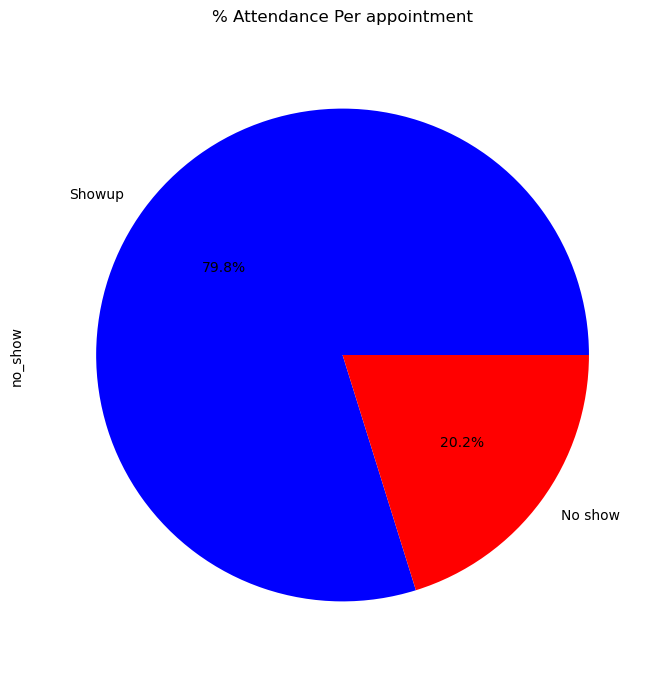

In [40]:
# Plot the result
status.plot.pie(figsize=(8,8), autopct='%1.1f%%', fontsize = 10, labels= ['Showup', 'No show'], colors=['blue', 'red'])
plt.title('% Attendance'+ ' Per appointment\n');

**Result summary**: the overall attendance (based on the number of appointments) is 79.8%.

### Research Question 2: (What are the proportions of each category for each variable, and what are the corresponding attendance rates broken down by category?)

### RQ2.1: Gender

#### 2.1.1 Propersion of `gender` per appointment

In [41]:
# Compute the distribution of gender in the dataset

value_counts = df['gender'].value_counts()
status = np.round(value_counts/df.shape[0]*100,2)

print('Femal:', status[0])
print('Male:', status[1])


Femal: 65.0
Male: 35.0


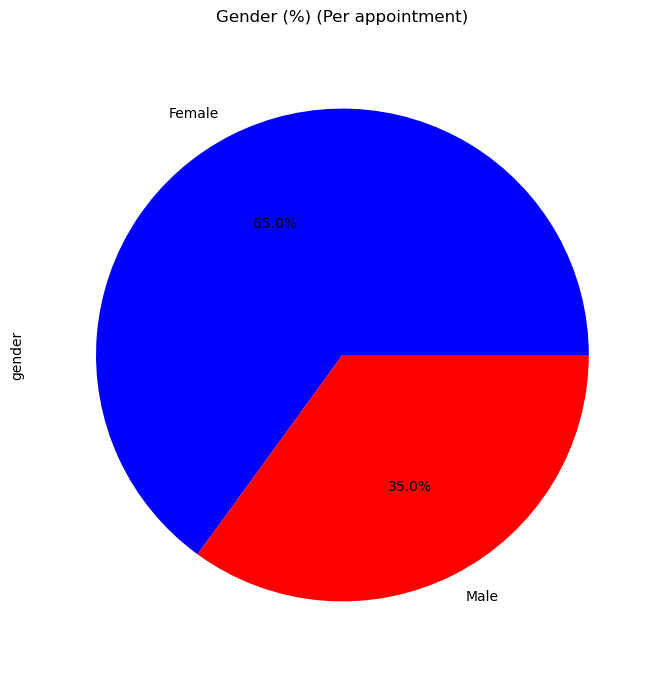

In [42]:
# Plot the result

status.plot.pie(figsize=(8,8), autopct='%1.1f%%', fontsize = 10, labels= ['Female', 'Male'], colors=['blue', 'red', 'green'])
plt.title('Gender'+ ' (%) (Per appointment)\n');

`As a result`
>the appointment proportion of females patients (64.28%) is greater than the appointment proportion of males patients (35.72%).


### Using `functions`
> In order to continue investigating the Research Question 2 for the rest of the variables, we are going to generalize those steps using functions. With the help of functions, we can avoid rewriting the same logic or code again and again.

`Note:` This [source](https://github.com/tkannab/Udacity-DAND-T1-P3-Investigate-a-Dataset) served as the inspiration for utilizing functions.

In [43]:
# Create a function that computes and displays the distribution of groups based on a univariable per the number of appointments

def UnivarProp(df, univariable):
    value_counts = df[univariable].value_counts()
    plot = value_counts.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12, colors=['blue', 'red', 'green', 'pink','yellow', 'purple', 'orange']);
    plot.set_title('% ' + univariable + ' per appointment\n', fontsize = 15);
    return np.round(value_counts/df.shape[0]*100,2)

#### 2.1.2 Number  of  patients `patient_id` per `gender` 

In [44]:
# To create a pivot table that groups the data by the 'gender' column, and calculates the number of unique patient_id associated with each gender
pivot_table = pd.pivot_table(df, index=df['gender'], values='patient_id',aggfunc = lambda x: len(x.unique()))

# To calculate the percentage of patient_id belonging to each gender group and round the resulting percentages to 2 decimal places
np.round(pivot_table/sum(pivot_table['patient_id'])*100,2)

,patient_id
gender,
F,64.28
M,35.72


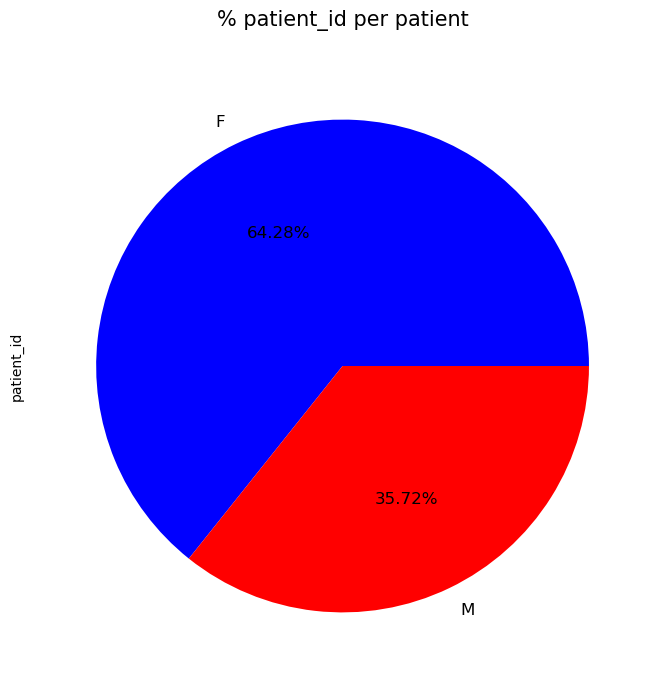

In [45]:
# Plot the result

pivot_table.plot.pie(figsize=(8,8), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False, colors=['blue', 'red']);
plt.title('% ' + 'patient_id' + ' per patient\n', fontsize = 15);

`As a result`
>nunmber of females patients (64.28%) is greater than the number of males patients (35.72%).

### Using `functions`
> In order to continue investigating the Research Question 2 for the rest of the variables, we are going to generalize those steps using functions. With the help of functions, we can avoid rewriting the same logic or code again and again.

`Note:` This [source](https://github.com/tkannab/Udacity-DAND-T1-P3-Investigate-a-Dataset) served as the inspiration for utilizing functions.

In [46]:
# Create a function that computes and displays the distribution of groups based on a univariable
def PatientsCount(df, univariable):
        pivot_table = pd.pivot_table(df, index=univariable, values='patient_id',aggfunc = lambda x: len(x.unique()))
        pivot_table.plot.pie(figsize=(8,8), autopct='%1.2f%%', subplots=True, fontsize = 11, legend = False, colors=['blue', 'red', 'green', 'pink','yellow', 'purple', 'orange']);
        plt.title('% ' + univariable + ' per patient\n', fontsize = 14);
        return np.round(pivot_table/sum(pivot_table['patient_id'])*100,2)

#### 2.1.3 Attendance rate of  male and female patients(`gender`)  per no. of appointments(`patient_id`)

In [47]:
# comput the proportion of each gender(F/M) that corresponds to each value of the 'no_show' column (showup/noshow)
show_by_gender = pd.crosstab(df['gender'], df['no_show'], normalize = 'index')

# round the result to two decimal places and convert them into percentages
np.round((show_by_gender * 100), decimals=2)

no_show,0,1
gender,,
F,79.69,20.31
M,80.04,19.96


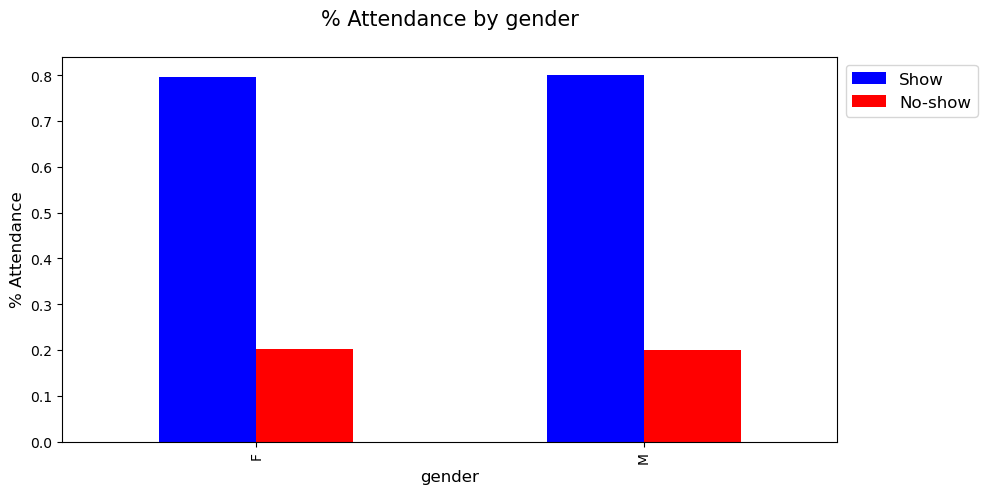

In [48]:
# plot the result
plot = show_by_gender.plot.bar(figsize=(10,5), label=['Show', 'No-show'], color=['blue', 'red'])
plt.title('% Attendance by ' + show_by_gender.index.name + '\n', fontsize = 15)
plt.xlabel(show_by_gender.index.name, fontsize = 12)
plt.ylabel('% Attendance', fontsize = 12)
plt.legend(['Show', 'No-show'], loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12);

`As a result`
>the attendance rate (showup per # appointments) of male patients (80.04%) is slightly greater than the female patients (79.69%) .

### Using `functions`
> In order to continue investigating the Research Question 2 for the rest of the variables, we are going to generalize those steps using functions. With the help of functions, we can avoid rewriting the same logic or code again and again.

`Note:` This [source](https://github.com/tkannab/Udacity-DAND-T1-P3-Investigate-a-Dataset) served as the inspiration for utilizing functions.

In [49]:
# Create a function that produces a bar chart based on a frequency table

def Attendance_bar_plot(df, group):
    # comput the proportion of each group that corresponds to each value of the 'no_show' column (showup/noshow)
    df_by_Group = pd.crosstab(df[group], df['no_show'], normalize = 'index')
    
    # round the result to two decimal places and convert them into percentages
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    
    # plot the result
    plot = df_by_Group.plot.bar(figsize=(10,5), label=['Show', 'No-show'], color=['blue', 'red', 'green', 'pink','yellow', 'purple', 'orange'])
    plt.title('% Attendance by ' + df_by_Group.index.name + '\n', fontsize = 15)
    plt.xlabel(df_by_Group.index.name, fontsize = 12)
    plt.ylabel('% Attendance', fontsize = 12)
    plt.legend(['Show', 'No-show'], loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12);
    
    # Add percentage labels
    for patch in plot.patches:
        height = patch.get_height()
        plot.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', fontsize=12);

    return df_by_Group

 **Result summary**: 
 
>-  The appointment proportion of females patients (64.28%) is greater than the appointment proportion of males patients (35.72%).
>- Nunmber of females patients (64.28%) is greater than the number of males patients (35.72%).
>- The attendance rate (showup per # appointments) of male patients (80.04%) is slightly greater than the female patients (79.69%). The variance between the maximum and minimum rates is 0.35%.

### RQ2.2: Age_Group

#### 2.2.1 Propersion of each `age_group` per appointment

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: age_group, dtype: float64

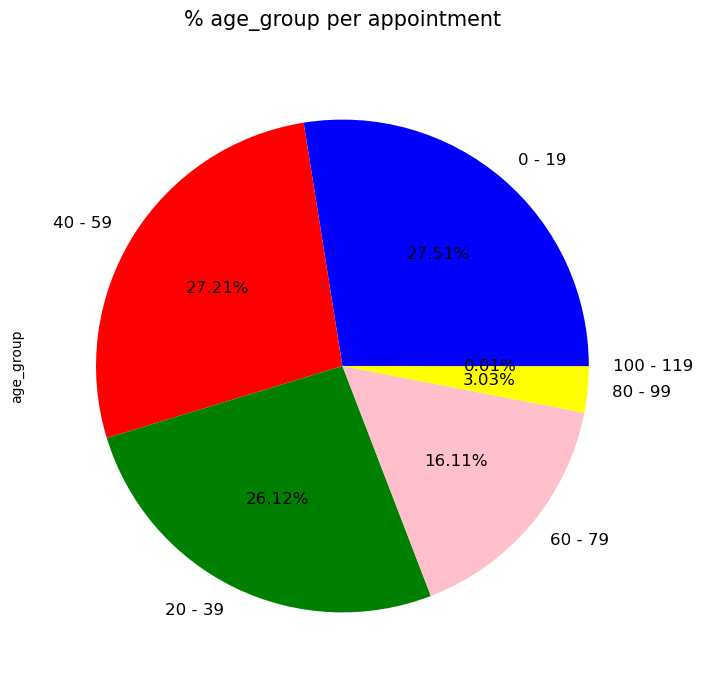

In [50]:
UnivarProp(df, 'age_group')

`As a result`
> the age_groups (0-19, 40-59, and 20-39) have the largest appointment proportion (27.51%, 27.21% and 26.12% respectively) comparing to the age_group (100-119) which has the smallest appointment proportion (0.01%). 

#### 2.2.2 Number  of  patients(`patient_id`) per each `age_group` 

,patient_id
age_group,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


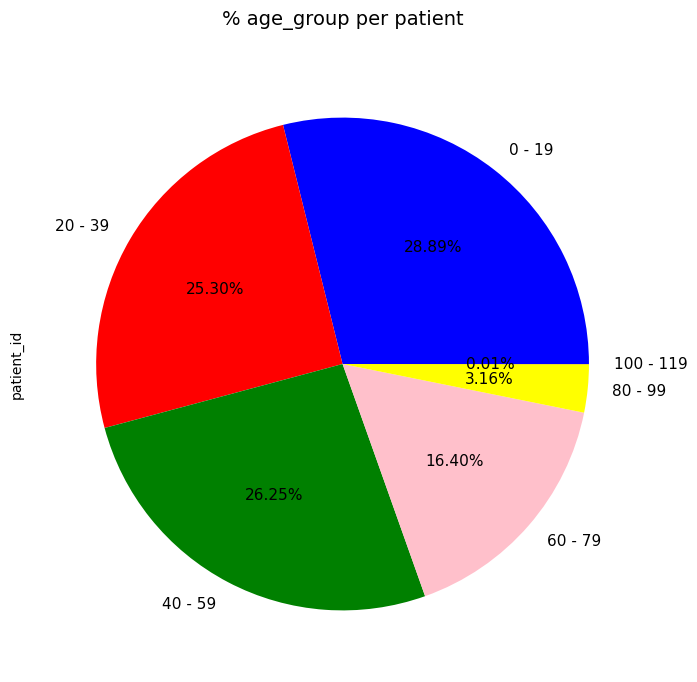

In [51]:
PatientsCount(df, 'age_group')

`As a result`
> the age_groups (0-19, 40-59, and 20-39) have the largest number of patients (27.51%, 27.21% and 26.12% respectively) comparing to the age_group (100-119) which has the smallest number of patients (0.01%). 

#### 2.2.3 Attendance rate of  male and female patients for each `age_group`  per no. of appointments `patient_id`

no_show,0,1
age_group,,
0 - 19,77.84,22.16
20 - 39,76.87,23.13
40 - 59,81.19,18.81
60 - 79,84.88,15.12
80 - 99,83.71,16.29
100 - 119,72.73,27.27


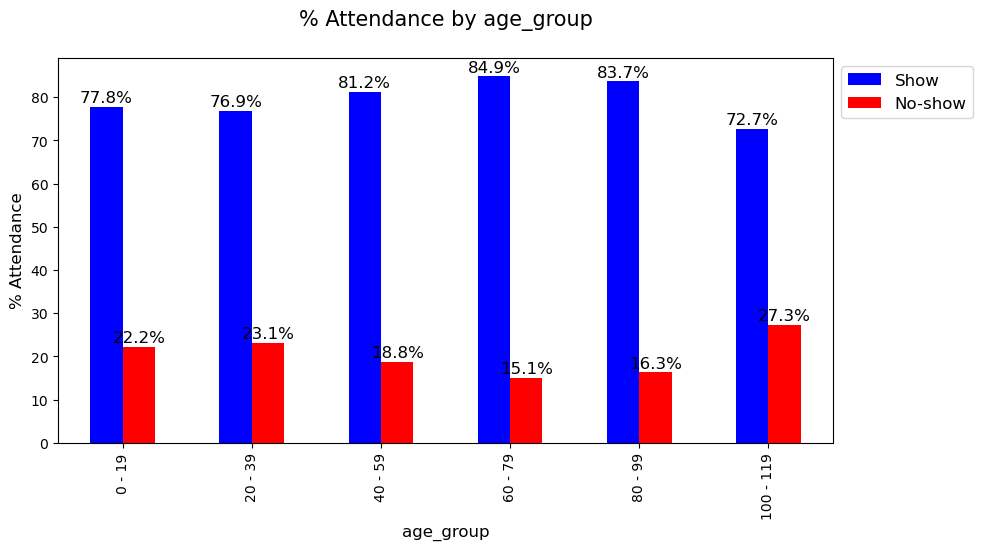

In [52]:
Attendance_bar_plot(df, 'age_group')

 **Result summary**: 
 
>-  The age_groups (0-19, 40-59, and 20-39) have the largest appointment proportion (27.51%, 27.21% and 26.12% respectively) comparing to the age_group (100-119) which has the smallest appointment proportion (0.01%).
>- The age_groups (0-19, 40-59, and 20-39) have the largest number of patients (27.51%, 27.21% and 26.12% respectively) comparing to the age_group (100-119) which has the smallest number of patients (0.01%).
>- The attendance rate (showup per # appointments) of age_group (60-79) is the highest (84.9%) whereas the lowest percentage (72.7%) of the age_group (100-119). The variance between the maximum and minimum rates is 12.2%.

### RQ2.3: Scholarship

#### 2.3.1 Propersion of `scholarship` per appointment

0    90.17
1     9.83
Name: scholarship, dtype: float64

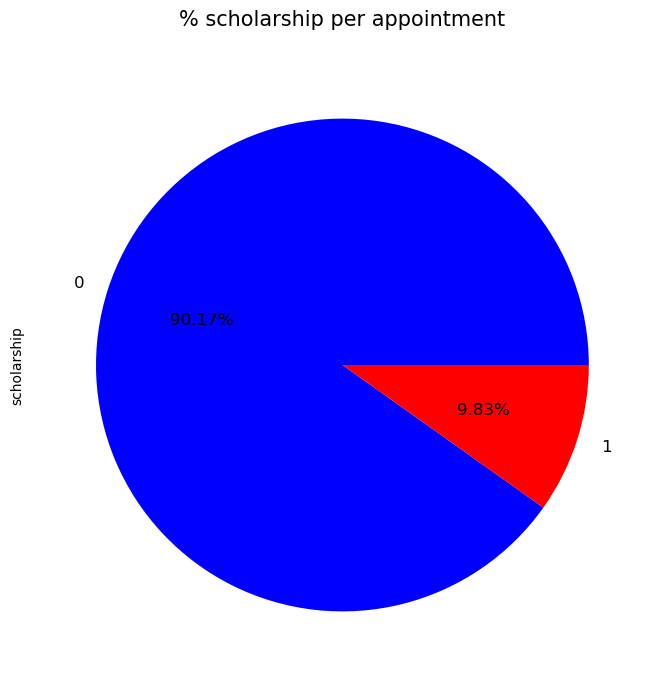

In [53]:
UnivarProp(df, 'scholarship')
# 0: No Scholarship, 1: Sccolarship

`As a result`
>the appointment proportion of patients having  scholarship (90.17%) is greater than the appointment proportion of patients without scholarship (9.83%).

#### 2.3.2 Number  of  patients(`patient_id`) per `scholarship` 

,patient_id
scholarship,
0,90.71
1,9.29


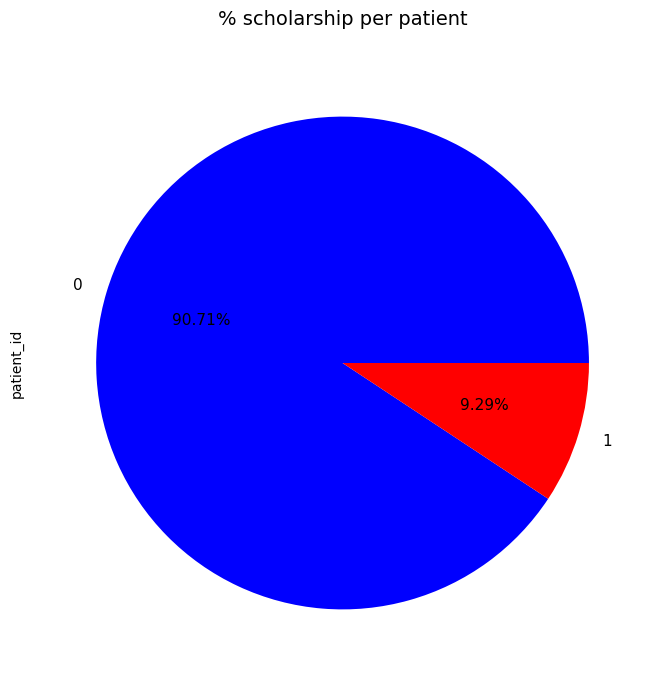

In [54]:
PatientsCount(df, 'scholarship')

`As a result`

> the number of patients having scholarship (90.71%) is greater than the number of patients without scholarship (9.29%).

#### 2.3.3 Attendance rate of  male and female patients with/without `scholarship`  per no. of appointments `patient_id`

no_show,0,1
scholarship,,
0,80.20,19.80
1,76.26,23.74


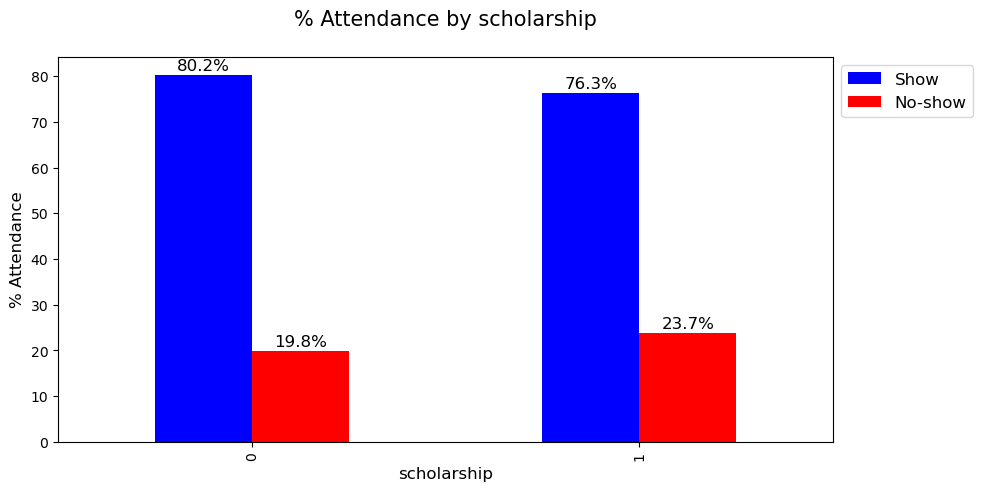

In [55]:
Attendance_bar_plot(df, 'scholarship')

 **Result summary**: 
 
>- The appointment proportion of patients having scholarship (90.17%) is greater than the appointment proportion of patients without scholarship (9.83%).
>- The number of patients having scholarship (90.71%) is greater than the number of patients without scholarship (9.29%).
>- The attendance rate (showup per # appointments) of patients with scholarship (80.02%) is greater than the patients without scholarship (76.3%). The variance between the maximum and minimum rates is 3.72%.

### RQ2.4: Hypertension

#### 2.4.1 Propersion of `hypertension` per appointment

0    80.27
1    19.73
Name: hypertension, dtype: float64

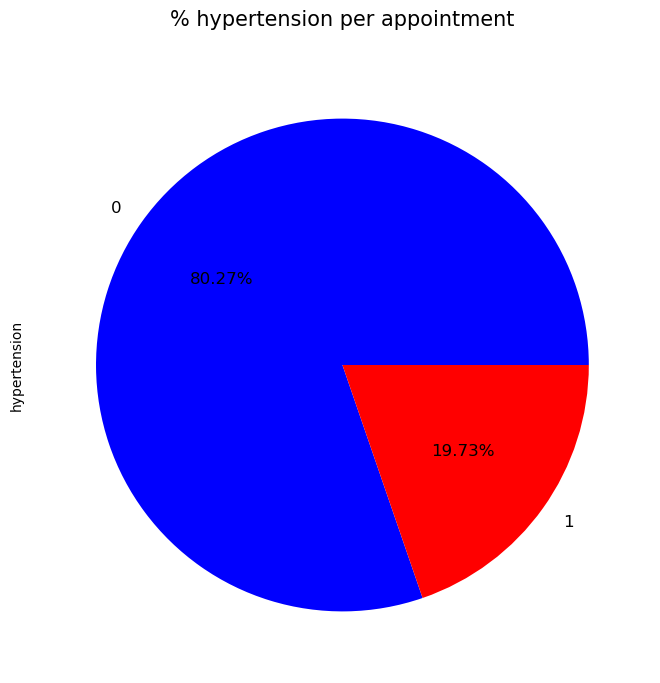

In [56]:
UnivarProp(df, 'hypertension')

`As a result`
> the appointment proportion of patients without hypertension (80.27%) is greater than the appointment proportion of patients having hypertension (19.73%).

#### 2.4.2 Number  of  patients(`patient_id`) per `hypertension` 

,patient_id
hypertension,
0,80.35
1,19.65


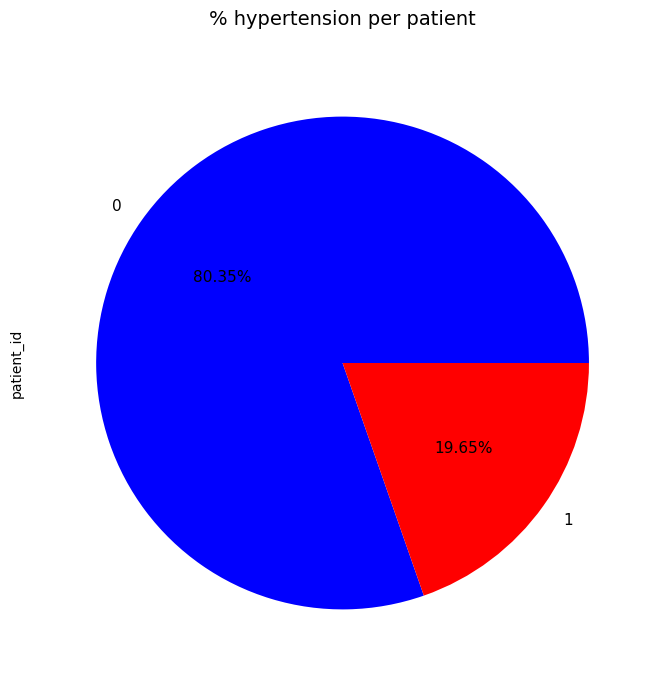

In [57]:
PatientsCount(df, 'hypertension')

`As a result`
> the number of patients without hypertension (80.35%) is greater than the number of patients having hypertension (19.65%).

#### 2.4.3 Attendance rate of  male and female patients with/without `hypertension`  per no. of appointments `patient_id`

no_show,0,1
hypertension,,
0,79.1,20.9
1,82.7,17.3


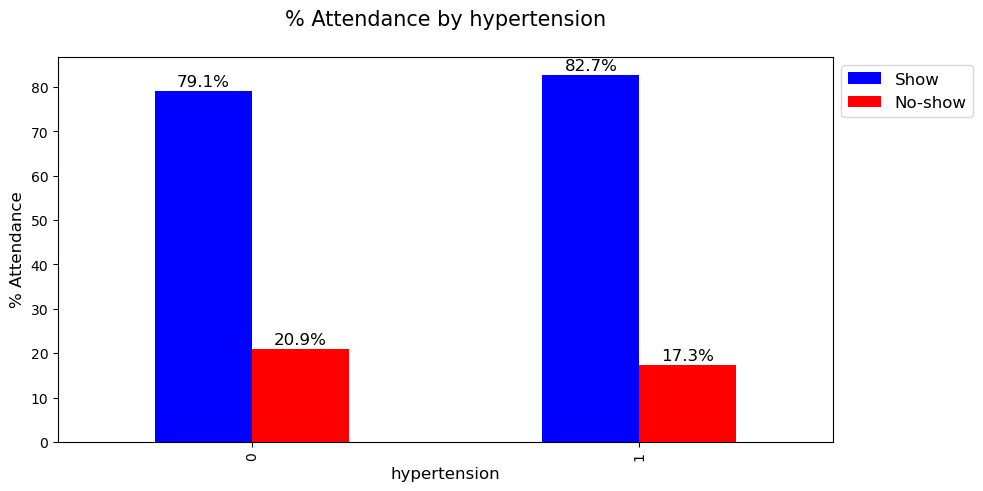

In [58]:
Attendance_bar_plot(df, 'hypertension')

 **Result summary**: 
 
>- The appointment proportion of patients without hypertension (80.27%) is greater than the appointment proportion of patients having hypertension (19.73%).
>- The number of patients without hypertension (80.35%) is greater than the number of patients having hypertension (19.65%).
>- The attendance rate (showup per # appointments) of patients having hypertension (82.7%) is greater than the patients without hypertension (79.1%). The variance between the maximum and minimum rates is 3.6%.

### RQ2.5: Diabetes

#### 2.5.1 Propersion of `diabetes` per appointment

0    92.81
1     7.19
Name: diabetes, dtype: float64

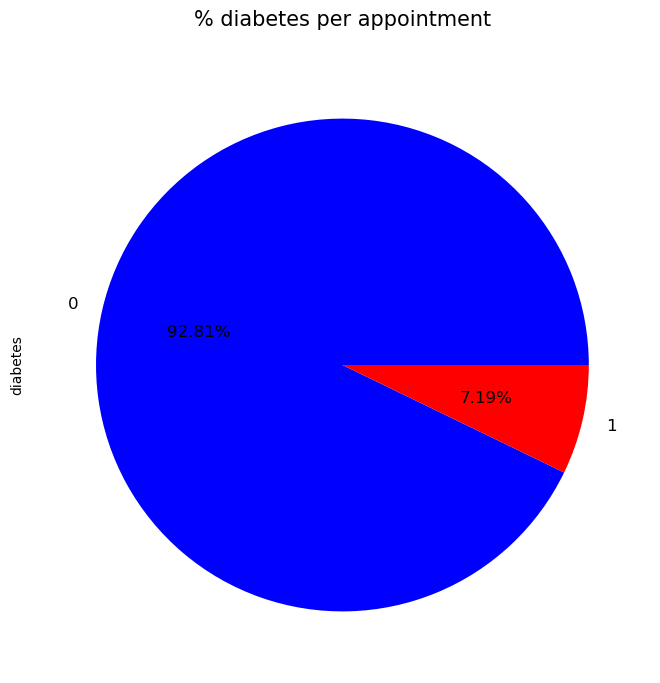

In [59]:
UnivarProp(df, 'diabetes')

`As a result`
> the appointment proportion of patients without diabetes (92.81%) is greater than the appointment proportion of patients having diabetes (7.19%).

#### 2.5.2 Number  of  patients(`patient_id`) per `diabetes` 

,patient_id
diabetes,
0,92.91
1,7.09


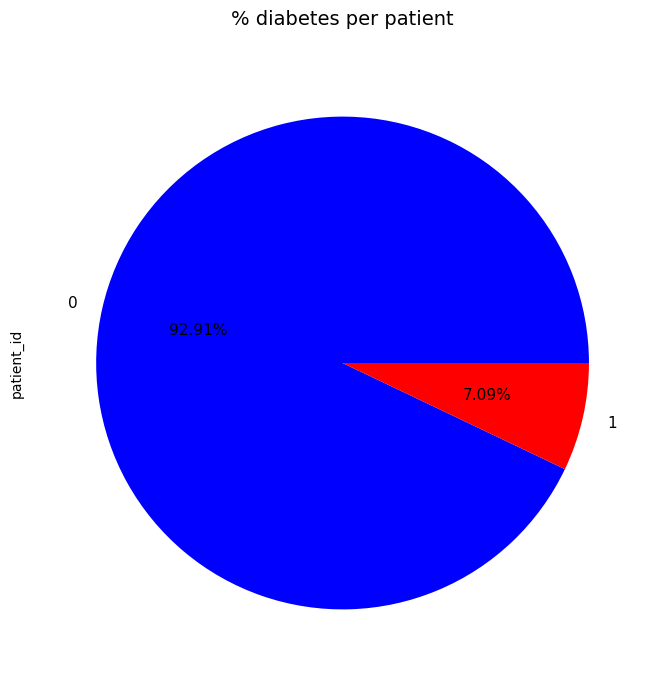

In [60]:
PatientsCount(df, 'diabetes')

`As a result`
> the number of patients without diabetes (92.91%) is greater than the number of patients having diabetes (7.09%).

#### 2.5.3 Attendance rate of  male and female patients with/without `diabetes`  per no. of appointments `patient_id`

no_show,0,1
diabetes,,
0,79.64,20.36
1,82.00,18.00


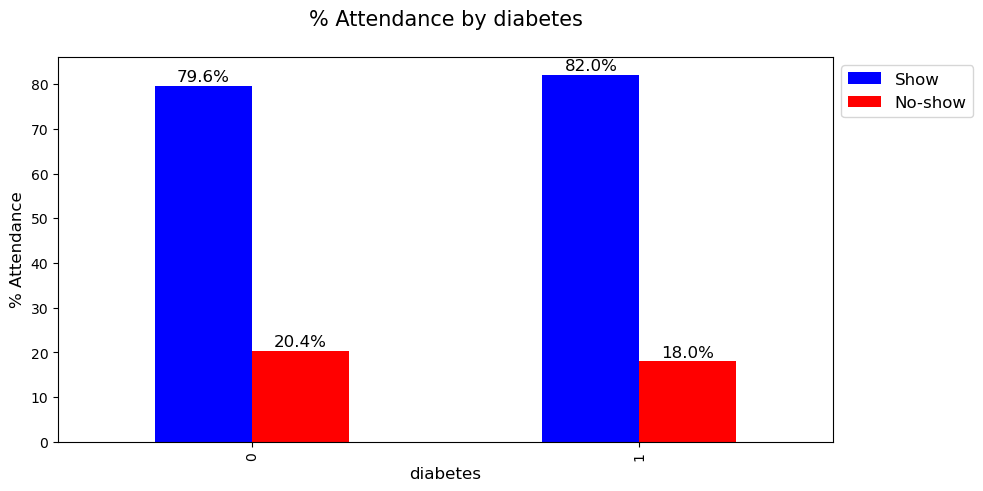

In [61]:
Attendance_bar_plot(df, 'diabetes')

 **Result summary**: 
 
>- The appointment proportion of patients without diabetes (92.81%) is greater than the appointment proportion of patients having diabetes (7.19%).
>- The number of patients without diabetes (92.91%) is greater than the number of patients having diabetes (7.09%).
>- The attendance rate (showup per # appointments) of patients having diabetes (82.0%) is greater than the patients without diabetes (79.6%). The variance between the maximum and minimum rates is 2.4%.

### RQ2.6: Alcoholism

#### 2.6.1 Propersion of `alcoholism` per appointment

0    96.96
1     3.04
Name: alcoholism, dtype: float64

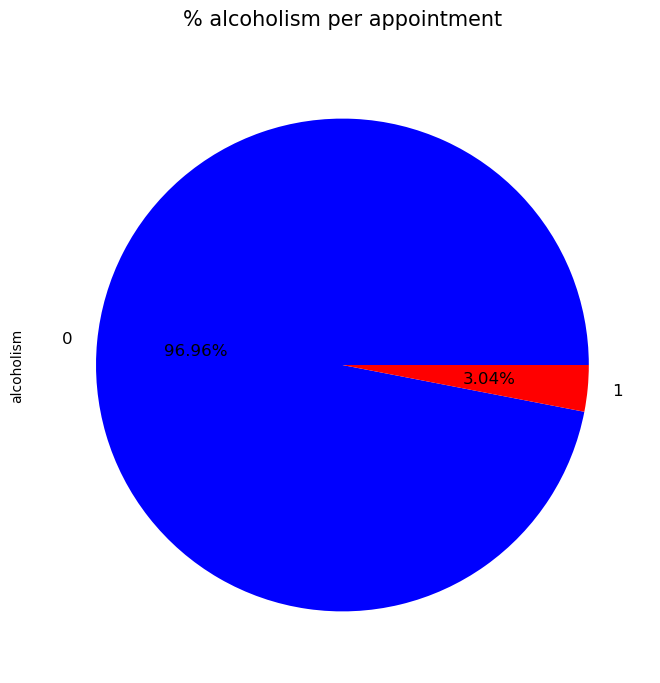

In [62]:
UnivarProp(df, 'alcoholism')

`As a result`
> the appointment proportion of patients without alcoholism (96.96%) is greater than the appointment proportion of patients having alcoholism (3.04%).

#### 2.6.2 Number  of  patients(`patient_id`) per `alcoholism` 

,patient_id
alcoholism,
0,97.58
1,2.42


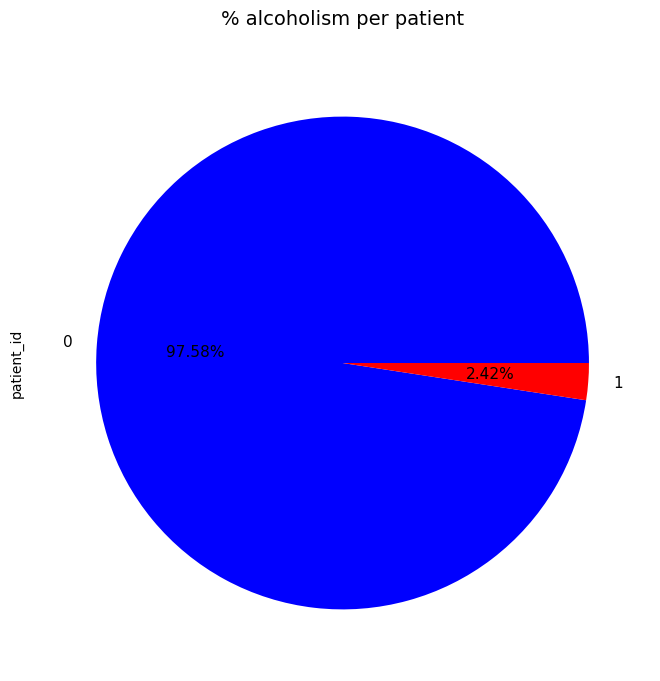

In [63]:
PatientsCount(df, 'alcoholism')

`As a result`
> the number of patients without alcoholism (97.58%) is greater than the number of patients having alcoholism (2.42%).

#### 2.6.3 Attendance rate of  male and female patients with/without `alcoholism`  per no. of appointments `patient_id`

no_show,0,1
alcoholism,,
0,79.81,20.19
1,79.85,20.15


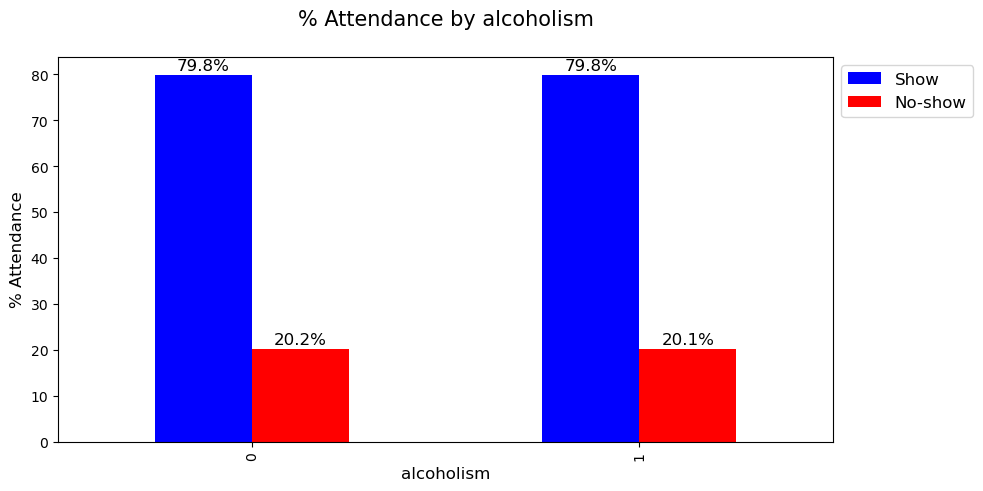

In [64]:
Attendance_bar_plot(df, 'alcoholism')

 **Result summary**: 
 
>- The appointment proportion of patients without alcoholism (96.96%) is greater than the appointment proportion of patients having alcoholism (3.04%).
>- The number of patients without alcoholism (97.58%) is greater than the number of patients having alcoholism (2.42%).
>- The attendance rate (showup per # appointments) of patients having alcoholism is equal to the patients without diabetes (79.8%).

### Q2.7: Handicap

#### 2.7.1 Propersion of `handicap` per appointment

0    97.97
1     1.85
2     0.17
3     0.01
4     0.00
Name: handicap, dtype: float64

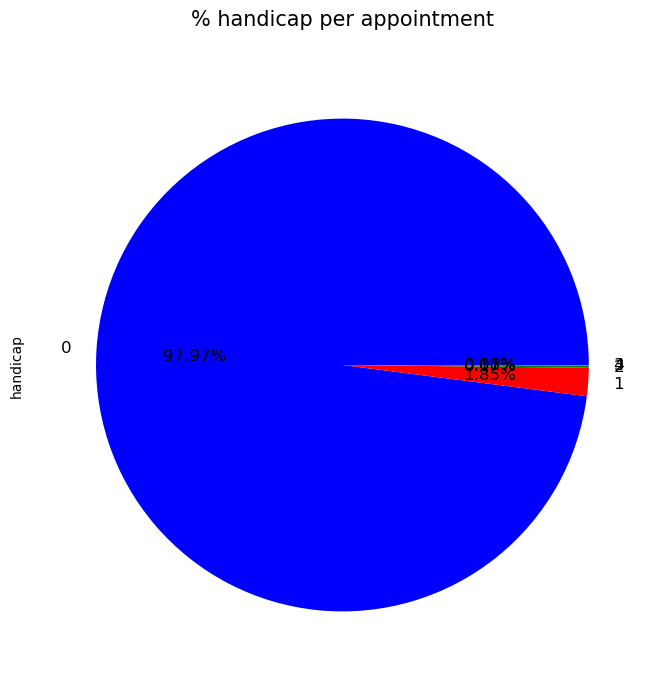

In [65]:
UnivarProp(df, 'handicap')
# 0: No handcapt, 1: handcap level1, 2: handcap level2, 3: handcap level4

`As a result`
> the appointment proportion of patients having no handicap (97.97%) is the greatest comparing to the rest.

#### 2.7.2 Number  of  patients (`patient_id`) per `handicap` 

,patient_id
handicap,
0,98.18
1,1.65
2,0.16
3,0.01
4,0.00


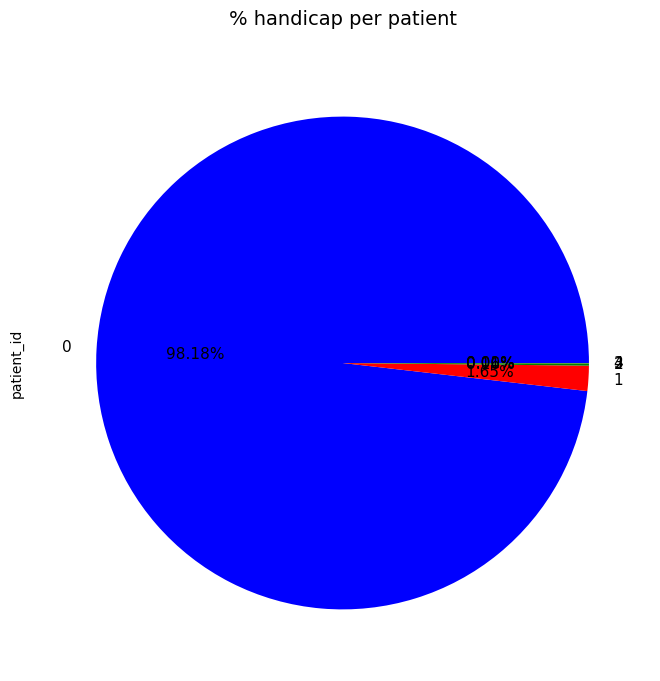

In [66]:
PatientsCount(df, 'handicap')

`As a result`
> the number of patients having no handicap (98.18%) is the greatest comparing to the rest.

#### 2.7.3 Attendance rate of  male and female patients with/without (`handicap`)  per no. of appointments(`patient_id`)

no_show,0,1
handicap,,
0,79.77,20.23
1,82.16,17.84
2,79.78,20.22
3,76.92,23.08
4,66.67,33.33


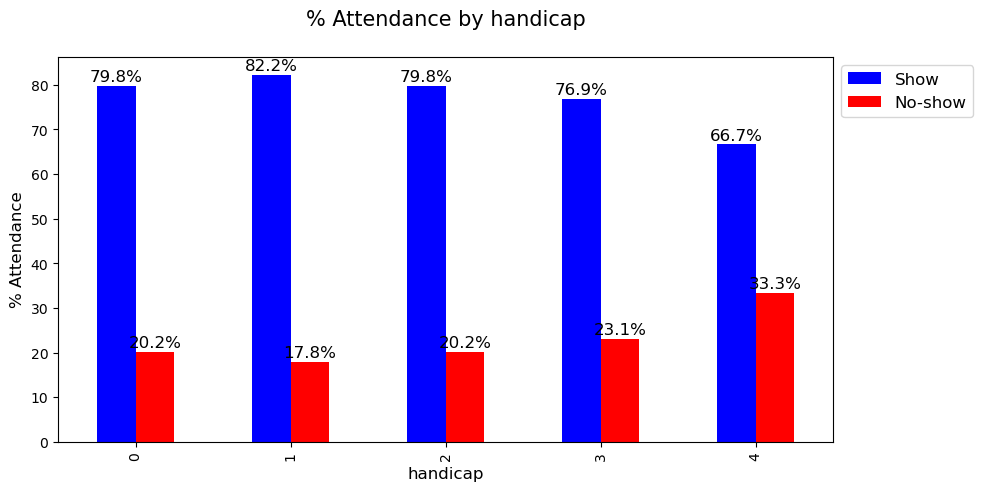

In [67]:
Attendance_bar_plot(df, 'handicap')

 **Result summary**: 
 
>- The appointment proportion of patients having no handicap (97.97%) is the greatest comparing to the rest.
>- The number of patients having no handicap (98.18%) is the greatest comparing to the rest.
>- The attendance rate (showup per # appointments) of patients having handcap level 1 is the highest (82.2%) whereas the lowest attendance rate is patients having handcap level 4 (66.7%). The variance between the maximum and minimum rates is 15.5%.

### RQ2.8: SMS_Received

#### 2.8.1 Propersion of `sms_received` per appointment

0    67.9
1    32.1
Name: sms_received, dtype: float64

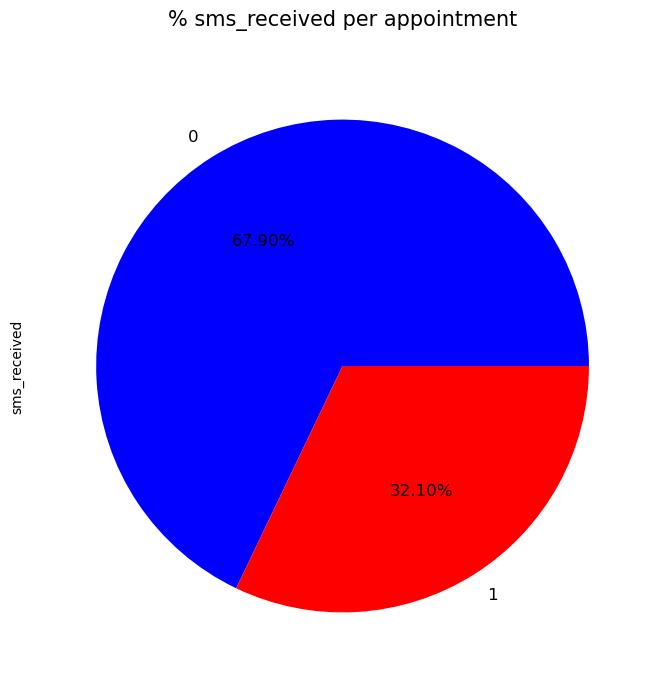

In [68]:
UnivarProp(df, 'sms_received')

`As a result`
> the appointment proportion of patients didn't receive SMS (67.90%) is greater than the appointment proportion of patients received SMS (32.10%).

#### 2.8.2 Number  of  patients(`patient_id`) per `sms_received` 

,patient_id
sms_received,
0,63.59
1,36.41


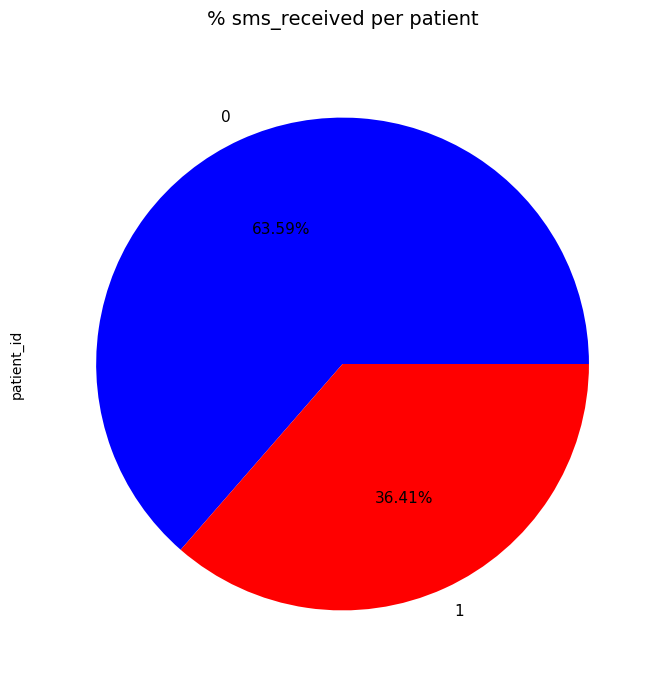

In [69]:
PatientsCount(df, 'sms_received')

`As a result`
> the number of patients didn't receive SMS (63.59%) is greater than the number of patients received SMS (36.41%).

#### 2.8.3 Attendance rate of  male and female patients with/without (`sms_received`)  per no. of appointments(`patient_id`)

no_show,0,1
sms_received,,
0,83.30,16.70
1,72.43,27.57


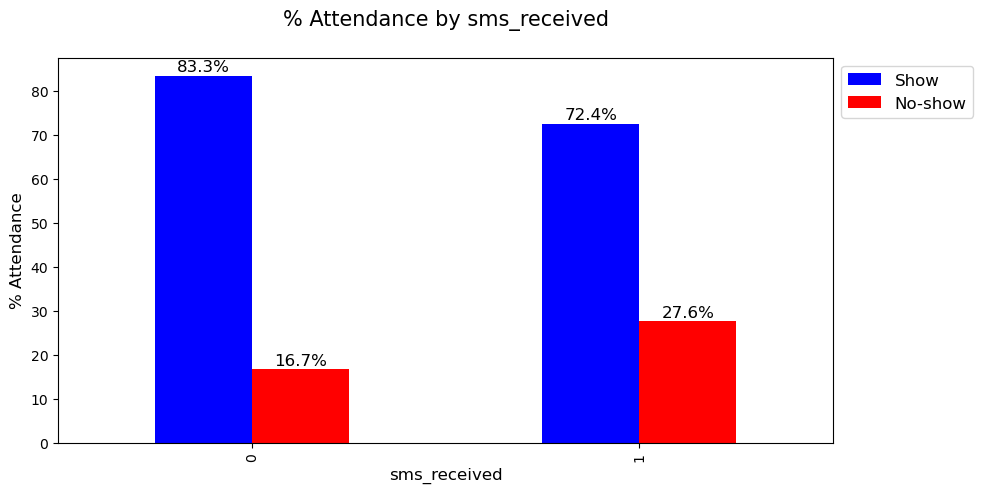

In [70]:
Attendance_bar_plot(df, 'sms_received')

 **Result summary**: 
 
>- The appointment proportion of patients didn't receive SMS (67.90%) is greater than the appointment proportion of patients received SMS (32.10%).
>- The number of patients didn't receive SMS (63.59%) is greater than the number of patients received SMS (36.41%)..
>- The attendance rate (showup per # appointments) of patients didn't receive SMS (83.3%) is higher than the patients received SMS (72.4%). The variance between the maximum and minimum rates is 10.9%.

### RQ2.9: Appointment_Day

#### 2.9.1 Propersion of `appointment_day` per appointment

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: appointment_day, dtype: float64

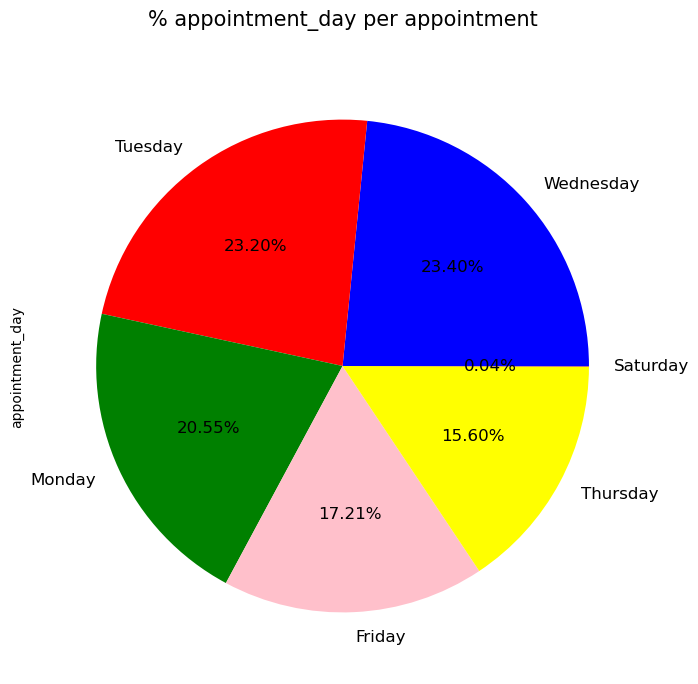

In [71]:
UnivarProp(df, 'appointment_day')

`As a result`
> the appointment proportion of patients on Wednesday (67.90%) is the highest in compare to the lowest appointment proportion of patients on Saturday (0.04%).

#### 2.9.2 Number  of  patients(`patient_id`) per `appointment_day` 

,patient_id
appointment_day,
Friday,17.28
Monday,20.52
Saturday,0.04
Thursday,16.29
Tuesday,22.99
Wednesday,22.88


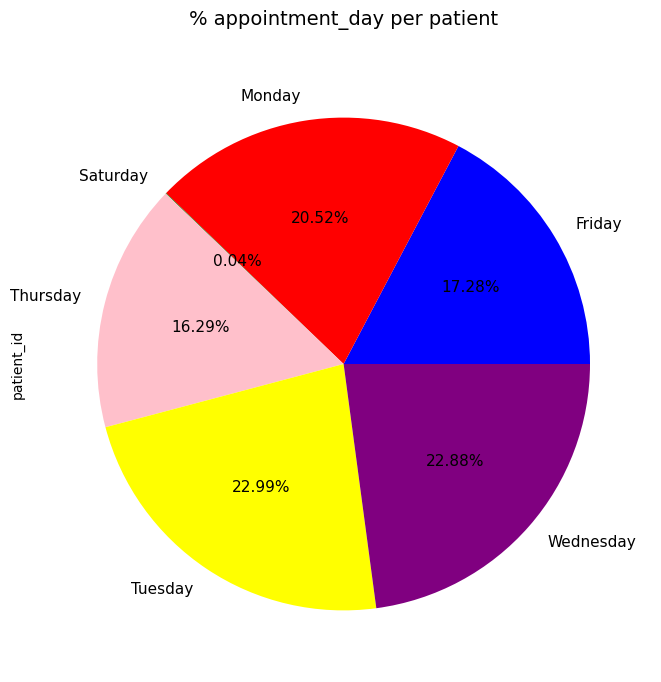

In [72]:
PatientsCount(df, 'appointment_day')

`As a result`
> the number of patients scheduled on Tuesday (22.99%) is the highest in compare to the lowest number of patients scheduled on Saturday (0.04%).

#### 2.9.3 Attendance rate of  male and female patients on different (`appointment_day`)  per no. of appointments(`patient_id`)

no_show,0,1
appointment_day,,
Friday,78.77,21.23
Monday,79.36,20.64
Saturday,76.92,23.08
Thursday,80.65,19.35
Tuesday,79.91,20.09
Wednesday,80.31,19.69


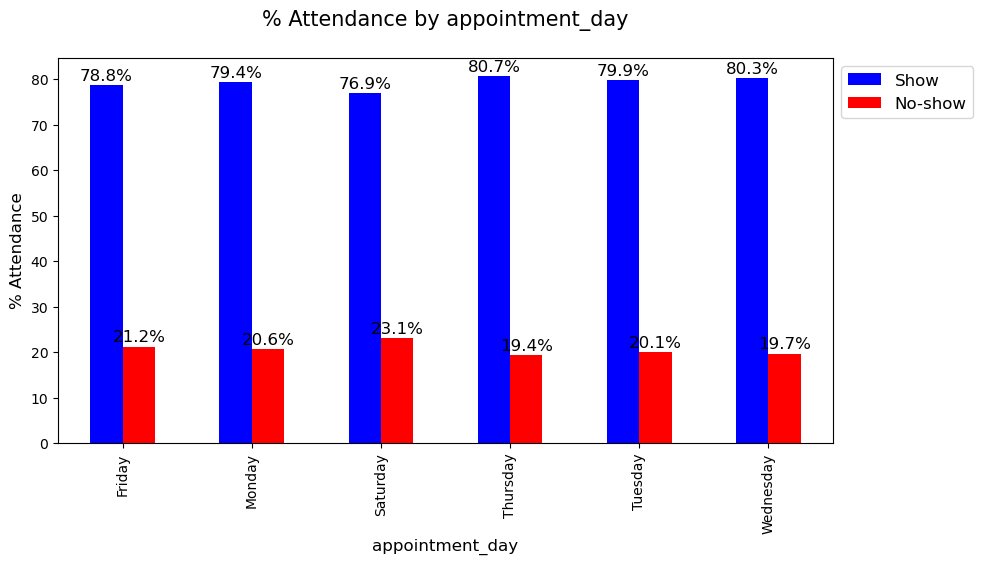

In [73]:
Attendance_bar_plot(df, 'appointment_day')

 **Result summary**: 
 
>- The appointment proportion of patients on Wednesday (67.90%) is the highest in compare to the lowest appointment proportion of patients on Saturday (0.04%).
>- The number of patients scheduled on Tuesday (22.99%) is the highest in compare to the lowest number of patients scheduled on Saturday (0.04%).
>- The attendance rate (showup per # appointments) of patients on Thursday (80.7%) is the highest whereas the lowest attendance rate is on Saterday (76.9%). The variance between the maximum and minimum rates is 3.8%.

### RQ2.10: Waiting Duration

#### 2.9.1 Propersion of `waiting_duration_group` per appointment

0-29       90.61
30-59       7.49
60-89       1.70
90-119      0.12
150-179     0.05
120-149     0.03
Name: waiting_duration_group, dtype: float64

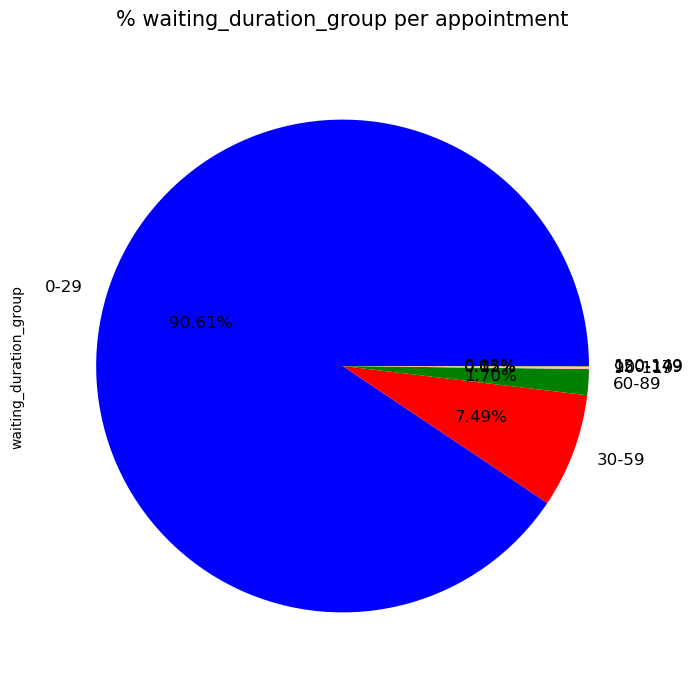

In [74]:
UnivarProp(df, 'waiting_duration_group')

`As a result`
> the appointment proportion of patients with a waiting duration (0-29) day is the highest (90.61%) whereas the lowest appointment proportion (0.03%) is for patients with a wating duration (120-149) day.

#### 2.9.2 Number  of  patients(`patient_id`) per `waiting_duration_group` 

,patient_id
waiting_duration_group,
0-29,85.98
30-59,11.12
60-89,2.58
90-119,0.19
120-149,0.04
150-179,0.08


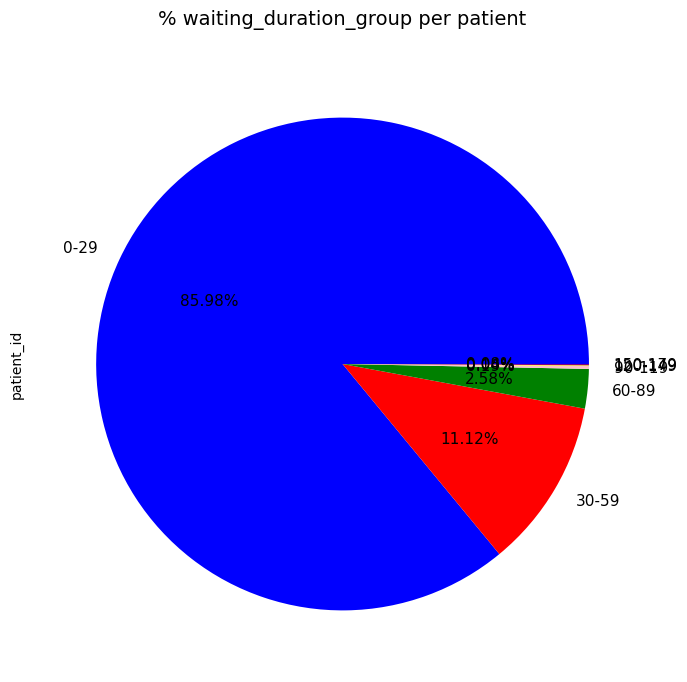

In [75]:
PatientsCount(df, 'waiting_duration_group')

`As a result`
> the number of patients with a waiting duration (0-29) day is the highest (85.98%) whereas the lowest number (0.04%) is for patients with a wating duration (120-149) day.

#### 2.9.3 Attendance rate of  male and female patients with different (`waiting_duration_group`)  per no. of appointments(`patient_id`)

no_show,0,1
waiting_duration_group,,
0-29,81.14,18.86
30-59,65.85,34.15
60-89,71.25,28.75
90-119,79.55,20.45
120-149,62.07,37.93
150-179,67.86,32.14


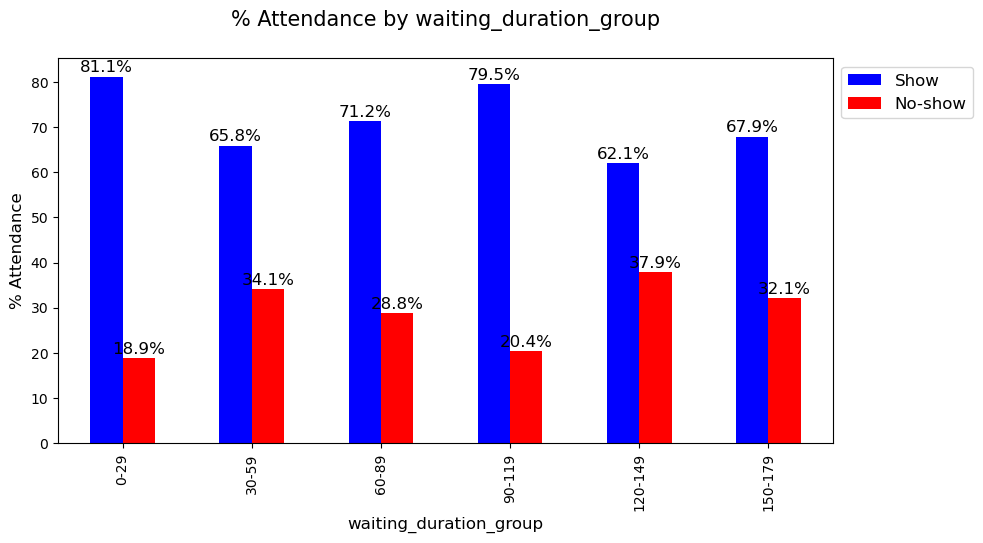

In [76]:
Attendance_bar_plot(df, 'waiting_duration_group')

 **Result summary**: 
 
>- The appointment proportion of patients with a waiting duration (0-29) day is the highest (90.61%) whereas the lowest appointment proportion (0.03%) is for patients with a wating duration (120-149) day.
>- The number of patients with a waiting duration (0-29) day is the highest (85.98%) whereas the lowest number (0.04%) is for patients with a wating duration (120-149) day.
>- The attendance rate (showup per # appointments) of patients with a waiting duration (0-29) day is the highest (81.1%) whereas the lowest attendance rate (62.1%) for patients with (120-149) day. The variance between the maximum and minimum rates is 19%.

<a id='conclusions'></a>
## Conclusions

This analysis doesn't give a final answer about why patients miss appointments because it doesn't use advanced methods like machine learning. Therefore, this analysis was drives by the following research questions:
- RQ1. What is the percentage of patients who attend or miss their scheduled appointments?
- RQ2. What are the proportions of each category for each variable, and what are the corresponding attendance rates broken down by category?

As a summary, the analysis shows that some things are important to predict if a patient will come to their appointment. People without Brazilian welfare may miss appointments more than those with it. Women tend to come to appointments more often. Patients aged 45-65 and young children are also more likely to come. Patients with hypertension and diabetes are more likely to attend their appointments than those with other diseases.
It's unexpected, but more patients showed up for their appointment when they didn't get an SMS about it. The connection between getting a reminder SMS and showing up for appointments doesn't make sense. Usually, people who receive an SMS reminder come to the hospital more often than those who don't.


#### General Statistical Results

- About 80% of patients showed up for their appointments.
- More female patients (64.28%) attended appointments than male patients (35.72%).
- The age group with the highest number of appointments was (0 - 19) years old (28.89%), while the age group with the lowest number of appointments was (100 - 119) years old (0.01%).
- Only 9.83% of patients had a scholarship.
- About 20% of patients experienced hypertension, while 7% had diabetes, and 2.42% had alcoholism.
- Only a small percentage of patients (less than 2%) had a handicap condition.
- Around 36% of patients received an SMS reminder for their appointment.
- The day with the most appointments was Wednesday (23.40%), while Saturday had the fewest appointments (0.04%).
- The majority of appointments (almost 90%) had a waiting duration between 0-29 days.

#### Bivariate Exploration Results
- About 1 in 5 patients (20.2%) missed more than one of their appointments.
- More male patients (80.04%) showed up to their appointments compared to female patients (79.69%).
- Patients aged 60-79 had the highest show-up rate (84.9%) while patients aged 100-119 had the lowest show-up rate (72.7%).
- Patients who didn't have a scholarship had a higher show-up rate (80.2%) than patients who had a scholarship (76.26%).
- Patients who had hypertension had a higher show-up rate (82.7%) than patients who didn't have hypertension (79.1%).
- Patients who had diabetes had a higher show-up rate (82%) than patients who didn't have diabetes (79.6%).
- Patients who had alcoholism had almost same show-up rate (79.8%) with patients who didn't have alcoholism.
- Patients with L1 handicap conditions had a higher show-up rate (82.2%) than patients with L4 handicap conditions (66.7%).
- Patients who didn't receive an SMS reminder had a higher show-up rate (83.3%) than patients who received an SMS reminder (72.4%).
- Patients who were scheduled to come on a Thursday had a higher show-up rate (80.7%) than patients who were scheduled to come on a Saturday (76.9%).
- Patients who had a waiting duration of 0-29 days had a higher show-up rate (81.1%) than patients who had a waiting duration of 120-149 days (62.1%).


#### Limitations:
- Since we didn't get enough information about certain cases where the data was unclear, we removed six entries from the original dataset.
- We couldn't look at the time dimension because all appointment times were set to 00:00:00.
- We used limited number of Research Questions and visualization charts.
- We focoused on bivariate exploration (visualizations of two variables) rather than multivariate exploration (visualizations of three or more variables).

#### Recommendations & Future work:
- Investigating mor Research Questions and using various visualization charts.
- Using multivariate exploration (visualizations of three or more variables).
- Applying advanced methods like inferential statistics techniques and machine learning.

#### Resources:
- [Pandas Documentation](https://pandas.pydata.org/docs/reference/)
- [GitHub](https://github.com/tkannab/Udacity-DAND-T1-P3-Investigate-a-Dataset)
- [Medium](https://medium.com/@ikhloud00_51119/capstone-project-medical-appointment-no-shows-5373877c495b)
- [ChatGPT](https://chat.openai.com/chat)